# Analytic Ising Model
We try analytically solve the inverse Ising problem using the Wolfram language. As we go along, I will explain aspects of the Wolfram language that were not obvious to me.

### Set no. of neurons/spins:

In [1]:
NN = 2

2

### Construct the Hamiltonian

In [2]:
Hamiltonian =  Sum[J[i, j] s[i] s[j], {j, 1, NN}, {i, 1,j-1}] + 
    Sum[ H[i] s[i], {i, 1, NN}] // Expand

H[1] s[1] + H[2] s[2] + J[1, 2] s[1] s[2]

In Wolfram, named functions take the form `Function[ args ]`. An important concept is that of [iterators](https://www.wolfram.com/language/fast-introduction-for-programmers/en/iterators/). For instance, the function `Sum[ i, {i,1,5,2} ]` will sum over the variable `i` from `1` to `5` incrementing by `2` each time. 

In [4]:
Sum[i,{i,1,5,2}]

9

### Construct the partition function `Z`
We can choose to represent whether the neuron is silent or fires as either {0,1}, or as {-1,1}. 

In [5]:
spinvals = (PadLeft[IntegerDigits[#, 2], NN] & /@ 
     Range[0, 2^NN - 1]) /. {0 -> 0}
reps = Table[s[i] -> #[[i]], {i, NN}] & /@ spinvals
Z = Total[(Exp[-Hamiltonian] /. reps)] 

{{0, 0}, {0, 1}, {1, 0}, {1, 1}}
{{s[1] -> 0, s[2] -> 0}, {s[1] -> 0, s[2] -> 1}, {s[1] -> 1, s[2] -> 0}, 
 
>   {s[1] -> 1, s[2] -> 1}}
     -H[1]    -H[2]    -H[1] - H[2] - J[1, 2]
1 + E      + E      + E
     -H[1] - L[1]    -H[2] - L[2]    -H[1] - H[2] - J[1, 2] - L[1] - L[2]
1 + E             + E             + E

One can define lambda functions, called *pure functions* by writing a function in terms of `#`s and ending it with a `&`. To then apply the function over multiple expressions, one can map it using `\@`. For instance, below we construct the pure function that squares its argument `#^2&`, and then we apply to a list of containing the lists `{0,1}` and `{2,3}`. 

In [9]:
#^2& /@ {{0,1},{2,3}}

{{0, 1}, {4, 9}}

Once we have an expression, for instance `x + y + z`, we can replace symbols with other ones. `/.` means *replace everywhere*. Below, we show how we can use it to replace `x` with `2` and `y` with `3`. It sort of copies the expression into the curly brackets and implements the suggested replacements.

In [10]:
x + y + z /. {x->2, y->3}
x + y + z /. {{{x->2}, {y->3}}, {y->3}}

5 + z
{{2 + y + z, 3 + x + z}, 3 + x + z}

### Construct the probability distributionn `p`.

-(H[1] s[1]) - H[2] s[2] - J[1, 2] s[1] s[2]
E
---------------------------------------------
     -H[1]    -H[2]    -H[1] - H[2] - J[1, 2]
1 + E      + E      + E
                          2                                            2
  -(H[1] s[1]) - L[1] s[1]  - H[2] s[2] - J[1, 2] s[1] s[2] - L[2] s[2]
 E
-------------------------------------------------------------------------
     -H[1] - L[1]    -H[2] - L[2]    -H[1] - H[2] - J[1, 2] - L[1] - L[2]
1 + E             + E             + E
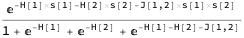
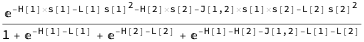

In [12]:
p = Exp[-Hamiltonian]/Z 

We can evaluate this expression at a particular configuration as follows (assuming we have 2 neurons):

2 (H[1] + J[1, 2])
            E
-------------------------------------------
     J[1, 2]   H[1]    H[2]    H[1] + H[2]
1 + E        (E     + E     + E           )
                          2 (H[1] + J[1, 2])
                         E
----------------------------------------------------------------------
     H[1] + J[1, 2] + L[1]    H[2] + J[1, 2] + L[2]       H[1] + L[1]
1 + E                      + E                      (1 + E           )
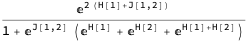
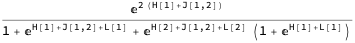

In [14]:
p /. {s[1]-> -1, s[2]->1} //FullSimplify

### Compute the expectations and correlations
When we represent the neuron states as `{-1,1}`, the auto-correlations are 1 since we either have `1*1` times a probability, or `-1*-1=1` times a probability, and all the probabilities sum to 1. On the other hand, when we represent the neuron states as `{0,1}`, the auto-correlations are equal to the expectations since the product of a neuron with itself takes on the same values as just the neuron by itself.   

1                                1
{-------------------------------, -------------------------------}
      H[1] + J[1, 2]       H[2]        H[2] + J[1, 2]       H[1]
     E               (1 + E    )      E               (1 + E    )
 1 + ---------------------------  1 + ---------------------------
              H[2] + J[1, 2]                   H[1] + J[1, 2]
         1 + E                            1 + E
                       1
{---------------------------------------------, 
      H[1] + J[1, 2] + L[1]       H[2] + L[2]
     E                      (1 + E           )
 1 + -----------------------------------------
                 H[2] + J[1, 2] + L[2]
            1 + E
 
                          1
>   ---------------------------------------------}
         H[2] + J[1, 2] + L[2]       H[1] + L[1]
        E                      (1 + E           )
    1 + -----------------------------------------
                    H[1] + J[1, 2] + L[1]
               1 + E
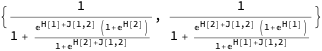
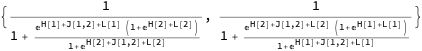

In [16]:
Averages = Table[ Total[s[i] p /. reps] // ExpToTrig // FullSimplify, {i,NN} ]

Note, we only work out the upper triangle of the correlation matrix. (Could I even leave out the diagonal?)

1
-------------------------------
     H[1] + J[1, 2]       H[2]
    E               (1 + E    )                                    1
1 + ---------------------------               -------------------------------------------
             H[2] + J[1, 2]                        J[1, 2]   H[1]    H[2]    H[1] + H[2]
        1 + E                                 1 + E        (E     + E     + E           )

                                                             1
                                              -------------------------------
                                                   H[2] + J[1, 2]       H[1]
                                                  E               (1 + E    )
                                              1 + ---------------------------
                                                           H[1] + J[1, 2]
0                                                     1 + E
                      1
---------------------------------------------
     H[1] + J[1, 2] + L[1]       H[2] + L[2]
    E                      (1 + E           )
1 + -----------------------------------------
                H[2] + J[1, 2] + L[2]
           1 + E
 



                                       1
     ----------------------------------------------------------------------
          H[1] + J[1, 2] + L[1]    H[2] + J[1, 2] + L[2]       H[1] + L[1]
>    1 + E                      + E                      (1 + E           )







0
 
                           1
     ---------------------------------------------
          H[2] + J[1, 2] + L[2]       H[1] + L[1]
         E                      (1 + E           )
     1 + -----------------------------------------
                     H[1] + J[1, 2] + L[1]
>               1 + E
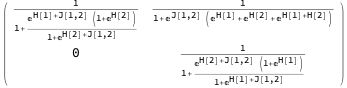
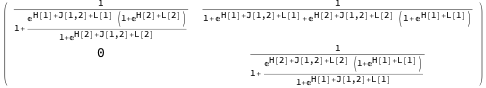

In [18]:
(CorrMatrix = 
  Table[Total[s[i] s[j] p /. reps] // ExpToTrig // FullSimplify, {i, 
    NN}, {j, i, NN}]) // PadLeft // MatrixForm 

## Solve for `H` and `J` given observed expectations and correlations

Let us say that we observe the expectations of 2 neurons, as well as their correlation. Can we find the `H` and `J` that gives us an Ising model that reproduces these statistics?

If we try analytically for expected values `a[1]` and `a[2]`, and correlation `b`, we obtain:

-1. b + a[1]
{{H[1] -> ConditionalExpression[-1. Log[------------] + 
                                             b
 
               1. + b - 1. a[1] - 1. a[2]
>       1. Log[--------------------------], 
                           b
 
>      0 < b < 1. && b < a[1] < 1. && b < a[2] < 1. + b - 1. a[1]], 
 
                                          1. + b - 1. a[1] - 1. a[2]
>    H[2] -> ConditionalExpression[1. Log[--------------------------] - 
                                                      b
 
               -1. b + a[2]
>       1. Log[------------], 0 < b < 1. && b < a[1] < 1. && b < a[2] < 1. + b - 1. a[1]]
                    b
 
>     , J[1, 2] -> 
 
                                   -1. b + a[1]           1. + b - 1. a[1] - 1. a[2]
>     ConditionalExpression[1. Log[------------] - 1. Log[--------------------------] + 
                                        b                             b
 
               -1. b + a[2]
>       1. Log[------------], 0 < b < 1. && b < a[1] < 1. && b < a[2] < 1. + b - 1. a[1]]
                    b
 
>     }}
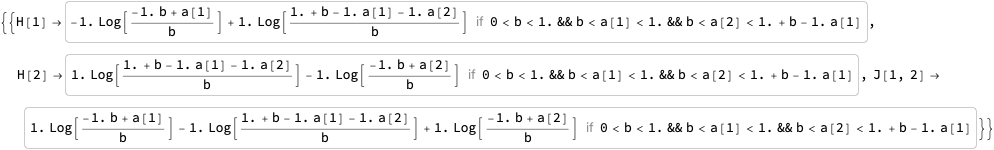

In [20]:
g = NSolve[{Averages[[1]]==a[1], Averages[[2]]==a[2], CorrMatrix[[1,2]]==b}, {H[1], H[2], J[1,2]}, Reals] 

On the other hand, we can find values for `H` and `J` numerically. Let us say neuron 1 has an expected value of 0.1, neuron 2 has an expected value of 0.9 and their correlation is 0.05 (every time neuron 1 fires, neuron 2 also fires half the time)

In [49]:
gNum = g /. {a[1]->0.1, a[2]->0.9, b->0.05} 

-16
{{H[1] -> 8.88178 10   , H[2] -> -2.83321, J[1, 2] -> 2.83321}}

## Checking the model reproduces the correct moments
We now plug in `H` and `J` and check expectations and correlations are reproduced. 

First, we check the averages, we should be 0.1 and 0.9. 

In [50]:
Table[ Total[s[i] p /. gNum /. reps], {i,NN} ]

{{0.1}, {0.9}}

Now, we check the correlations, we should be 0.05.

In [51]:
Total[s[1] s[2] p /. gNum /. reps]

{0.05}

Finally, the auto-correlations should be the same as the averages if we use the $s\in\{0,1\}$ encoding, and should be 1 if we use the $s\in\{-1,1\}$ encoding

In [52]:
Total[s[1] s[1] p /. gNum /. reps]
Total[s[2] s[2] p /. gNum /. reps]

{0.1}
{0.9}